## Inteligență Artificială  Tema 1 - 2025: Sokoban

Responsabili:
- Andrei Olaru
- Cătălin Chiru
- Andrei Dugăeșescu
- Mihai Nan
- Vlad Matei Drăghici
- Alexandru Baciu
- Bogdan-Andrei Sprîncenatu

In [10]:
from sokoban import Map, save_images, create_gif
import time

# Creating a map 

In [11]:
# Maps can be created using the Map class
map_from_init = Map(5, 5, 0, 0, [('box1', 1, 3)], [(4, 4)], [(3,3), (3,4), (3,1)], 'easy_map1')

# Maps can be created through yaml files
map_from_yaml = Map.from_yaml('tests/easy_map1.yaml')

assert str(map_from_init) == str(map_from_yaml), "Reading from yaml file Failed"

In [12]:
# Maps can also be created from their string representation
map_str = str(map_from_init)
map_from_str = Map.from_str(map_str)

assert str(map_from_init) == str(map_from_str), "String conversion Failed"

# Solving a map 

In [13]:
map = Map.from_yaml('tests/easy_map1.yaml')

# Visualizing a map 

In [14]:
print(map)


_ _ _ _ X 
_ / _ / / 
_ _ _ _ _ 
_ _ _ B _ 
P _ _ _ _ 


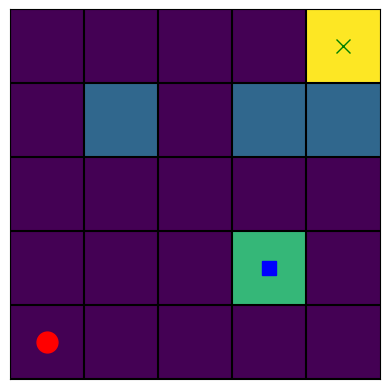

In [15]:
map.plot_map()

In [16]:
# To save the state of a map to disk:
# map.save_map('images', 'easy_map1_init.png')

In [17]:
import os
from search_methods.solver import Solver

directory_path = "tests"

maps = []
maps_name = []
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    maps.append(Map.from_yaml(file_path))
    maps_name.append(filename)
            
# map = Map.from_yaml('tests/medium_map2.yaml')
# solver = Solver(map, "medium_map2")
# solver.solve_beam_search(True)

results = []
no_states = []
i = 0
for map in maps:
    print("-----" + maps_name[i] + "-------")
    solver = Solver(map, "default")
    res = solver.solve_beam_search()
    results.append(res)
    no_states.append(solver.beam_solver.no_states)
    i += 1

-----easy_map1.yaml-------
box1
(4, 4)
box1
(4, 4)
-------beam search-----
number of explored states is 17
number of undo moves is 1
explored 241
-----easy_map2.yaml-------
box1
(4, 4)
box1
(4, 4)
-------beam search-----
number of explored states is 9
number of undo moves is 0
explored 140
-----hard_map1.yaml-------
box1
(6, 5)
box2
(0, 4)
box4
(0, 1)
box3
(1, 0)
box1
(6, 5)
box2
(0, 4)
box4
(0, 1)
box3
(1, 0)
-------beam search-----
number of explored states is 127
number of undo moves is 24
explored 2790
-----hard_map2.yaml-------
box1
(7, 4)
box2
(0, 4)
box1
(7, 4)
box2
(0, 4)
-------beam search-----
number of explored states is 38
number of undo moves is 2
explored 844
-----large_map1.yaml-------
box2
(5, 6)
box1
(6, 8)
box2
(5, 6)
box1
(6, 8)
-------beam search-----
number of explored states is 26
number of undo moves is 4
explored 642
-----large_map2.yaml-------
box1
(5, 4)
box3
(3, 8)
box2
(6, 10)
box1
(5, 4)
box3
(3, 8)
box2
(6, 10)
-------beam search-----
number of explored st

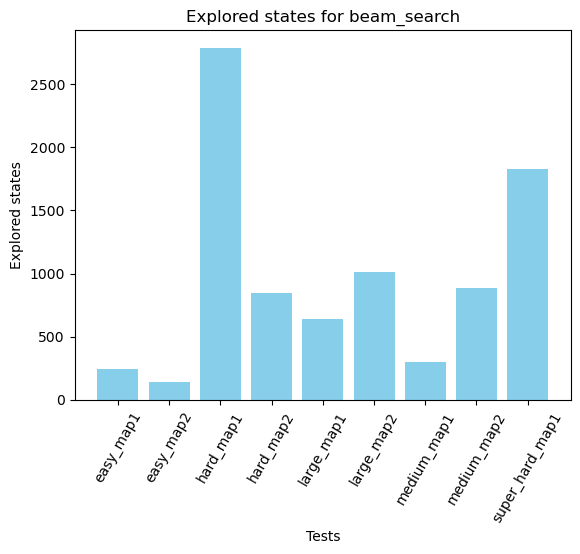

In [18]:
import matplotlib.pyplot as plt

categories = []
for filename in os.listdir(directory_path):
    name, ext = os.path.splitext(filename)
    categories.append(name)

values = no_states
# for res in results:
#     values.append(res.explored_states if res else 0)

plt.bar(categories, values, color="skyblue")

plt.xlabel("Tests")
plt.ylabel("Explored states")
plt.title("Explored states for beam_search")
plt.xticks(rotation=60)
plt.show()

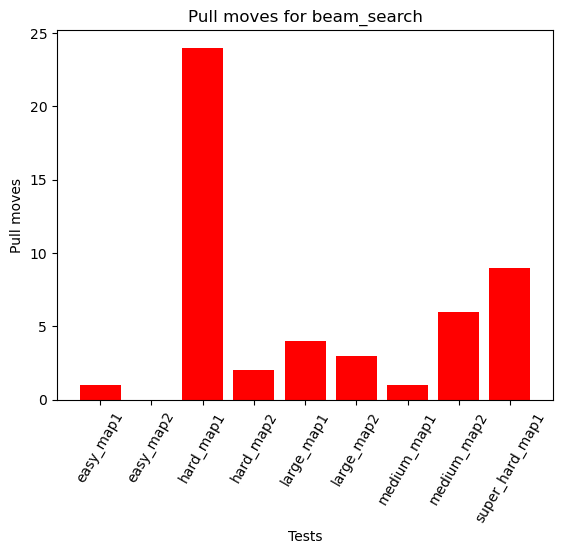

In [19]:
categories = []
for filename in os.listdir(directory_path):
    name, ext = os.path.splitext(filename)
    categories.append(name)

values = []
for res in results:
    values.append(res.undo_moves)

plt.bar(categories, values, color="red")

plt.xlabel("Tests")
plt.ylabel("Pull moves")
plt.title("Pull moves for beam_search")
plt.xticks(rotation=60)
plt.show()